<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/KerasRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




*   Tensorflow is the backend and Keras is the API in that.
*   Now, from Keras API we'll use models which contains the different types of models of which we'll use Sequential Model for now.

*   Layers class is nothing but type of Layer we want to add to our model. For now we'll use Dense Layer which is a fully connected layer i.e., each neuron is connected to every other neuron.





In [3]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



*   Now, will import numpy and matplot lib for visualizations



In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Random numbers are random in nature and every time kernel restart happens the value stored. So, we'll use seed with a location so that our data will be stored in that particular location on Kernel even if Kernel restarts data can be retrieved from that seed.

*  Generating random data in Linear Regression format y=mx+c



In [8]:
np.random.seed(1337)
X=np.linspace(-1,1,200)
np.random.shuffle(X)
y=2*X+np.random.randn(*X.shape)*0.33

Plotting the data which should look like a Linear Regression plot as we've used y=mx+c

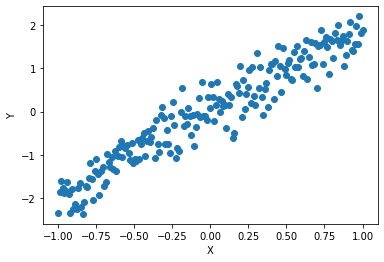

In [13]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
X_train,y_train=X[:160],y[:160]
X_test,y_test=X[160:],y[160:]

#### * We are adding Dense layer with input dimension as 1, units=1 and initializing kernel to uniform because we want weights to be uniform and activation function to be linear.
#### * Once we are done with adding layer, we've to compile it and we've to pass 2 parameters to compile loss & optimizer.


In [19]:
model=Sequential()
model.add(Dense(input_dim=1,units=1,kernel_initializer='uniform',activation='linear'))
model.compile(loss='mse',optimizer='sgd')

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


#### Now, let us fit our data on the model built in above steps on train data, here we'll give validation_split to use 20% of training data for Validation purpose and see the loss incurred on both training & Validation data.

In [37]:
from tensorflow.random import set_seed
set_seed(1337)
model.fit(X_train,y_train,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 37ms/step - loss: 0.1207 - val_loss: 0.0908
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1207 - val_loss: 0.0908
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.1207 - val_loss: 0.0908
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1208 - val_loss: 0.0907
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1207 - val_loss: 0.0908
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1208 - val_loss: 0.0907
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1207 - val_loss: 0.0907
Epoch 8/100
4/4 [==============================] - 0s 14ms/step - loss: 0.1207 - val_loss: 0.0907
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.1207 - val_loss: 0.0907
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1207 - val_loss: 0.0907
Epoch 11/100
4/4 [=

#### Now let us predict values for the model

In [44]:
y_pred=model.predict(X_test)

#### Now let us get the weights.

#### * We've to mention the layer first then index of neuron and the connection i.e., weights[layer][neuron][connection]

In [40]:
weights=model.layers[0].get_weights()
weights[0][0][0]

1.9186752

#### * For getting Bias we'll have to mention weights[layer][neuron] as bias won't have any connection.

In [42]:
weights[1][0]

0.04352439